In [2]:
#working copy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

def preprocess_data(file_path, date_col, date_format, data_type='monthly'):
    data = pd.read_csv(file_path)
    
    # Convert column names to lower case and replace spaces with underscores
    data.columns = data.columns.str.lower().str.replace(' ', '_')
    
    # Convert date_col to lower case as well for consistency
    date_col = date_col.lower()
    
    # Parse the date column
    data[date_col] = pd.to_datetime(data[date_col], format=date_format)
    
    # Handle monthly vs. yearly data
    if data_type == 'yearly':
        # For yearly data, convert dates to just years and set as index
        data['year'] = data[date_col].dt.year
        data.set_index('year', inplace=True)
    elif data_type == 'monthly':
        # For monthly data, convert dates to 'YearMonth' period and set as index
        data['yearmonth'] = data[date_col].dt.to_period('M')
        data.set_index('yearmonth', inplace=True)
    
    # Fill missing values with forward fill
    data.fillna(method='ffill', inplace=True)
    
    return data


In [3]:
file_info_list = [
    {
        'file_path': r"C:\Users\Ken\Documents\Code Projects\Data_ML_Projects\MLProjectClimateResearch\ClimateResearchProject\Data\Temperature\SurfaceAirTemperatureAnnualMeanDailyMaximum.csv",
        'date_col': 'year',
        'date_format': '%Y',
        'data_type': 'yearly'
    },
    {
        'file_path': r"C:\Users\Ken\Documents\Code Projects\Data_ML_Projects\MLProjectClimateResearch\ClimateResearchProject\Data\Temperature\SurfaceAirTemperatureAnnualMeanDailyMinimum.csv",
        'date_col': 'year',
        'date_format': '%Y',
        'data_type': 'yearly'
    },
    {
        'file_path': r"C:\Users\Ken\Documents\Code Projects\Data_ML_Projects\MLProjectClimateResearch\ClimateResearchProject\Data\Temperature\SurfaceAirTemperatureMonthlyAbsoluteExtremeMaximum.csv",
        'date_col': 'month',
        'date_format': '%Y-%m',
        'data_type': 'monthly'
    },
    {
        'file_path': r"C:\Users\Ken\Documents\Code Projects\Data_ML_Projects\MLProjectClimateResearch\ClimateResearchProject\Data\Temperature\SurfaceAirTemperatureMonthlyAbsoluteExtremeMinimum.csv",
        'date_col': 'month',
        'date_format': '%Y-%m',
        'data_type': 'monthly'
    },
    {
        'file_path': r"C:\Users\Ken\Documents\Code Projects\Data_ML_Projects\MLProjectClimateResearch\ClimateResearchProject\Data\Temperature\SurfaceAirTemperatureMonthlyMean.csv",
        'date_col': 'month',
        'date_format': '%Y-%m',
        'data_type': 'monthly'
    },

    {
        'file_path': r"C:\Users\Ken\Documents\Code Projects\Data_ML_Projects\MLProjectClimateResearch\ClimateResearchProject\Data\Temperature\SurfaceAirTemperatureMonthlyMeanDailyMaximum.csv",
        'date_col': 'month',
        'date_format': '%Y-%m',
        'data_type': 'monthly'
    },
    {
        'file_path': r"C:\Users\Ken\Documents\Code Projects\Data_ML_Projects\MLProjectClimateResearch\ClimateResearchProject\Data\Temperature\SurfaceAirTemperatureMonthlyMeanDailyMinimum.csv",
        'date_col': 'month',
        'date_format': '%Y-%m',
        'data_type': 'monthly'
    },
    
    #add other files as needed
]

In [4]:
# Assuming file_info_list is defined with the correct paths and columns
# Loop through each file and preprocess
preprocessed_dataframes = {}
for file_info in file_info_list:
    base_name = os.path.basename(file_info['file_path']).split('.')[0]
    preprocessed_data = preprocess_data(
        file_path=file_info['file_path'],
        date_col=file_info['date_col'],
        date_format=file_info['date_format'],
        data_type=file_info['data_type']
    )
    preprocessed_dataframes[base_name] = preprocessed_data

C:\Users\Ken\AppData\Local\Temp\ipykernel_8264\2678958278.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\Ken\AppData\Local\Temp\ipykernel_8264\2678958278.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\Ken\AppData\Local\Temp\ipykernel_8264\2678958278.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\Ken\AppData\Local\Temp\ipykernel_8264\2678958278.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\Ken\AppData

In [5]:
#check column names of each datafile
for file_info in file_info_list:
    file_path = file_info['file_path']  # This already has the raw string format (r"..." if using windows)
    data = pd.read_csv(file_path)
    print(file_path, data.columns)

C:\Users\Ken\Documents\Code Projects\Data_ML_Projects\MLProjectClimateResearch\ClimateResearchProject\Data\Temperature\SurfaceAirTemperatureAnnualMeanDailyMaximum.csv Index(['year', 'temp_mean_daily_max'], dtype='object')
C:\Users\Ken\Documents\Code Projects\Data_ML_Projects\MLProjectClimateResearch\ClimateResearchProject\Data\Temperature\SurfaceAirTemperatureAnnualMeanDailyMinimum.csv Index(['year', 'tem_mean_daily_min'], dtype='object')
C:\Users\Ken\Documents\Code Projects\Data_ML_Projects\MLProjectClimateResearch\ClimateResearchProject\Data\Temperature\SurfaceAirTemperatureMonthlyAbsoluteExtremeMaximum.csv Index(['month', 'max_temperature'], dtype='object')
C:\Users\Ken\Documents\Code Projects\Data_ML_Projects\MLProjectClimateResearch\ClimateResearchProject\Data\Temperature\SurfaceAirTemperatureMonthlyAbsoluteExtremeMinimum.csv Index(['month', 'temp_extremes_min'], dtype='object')
C:\Users\Ken\Documents\Code Projects\Data_ML_Projects\MLProjectClimateResearch\ClimateResearchProject\D

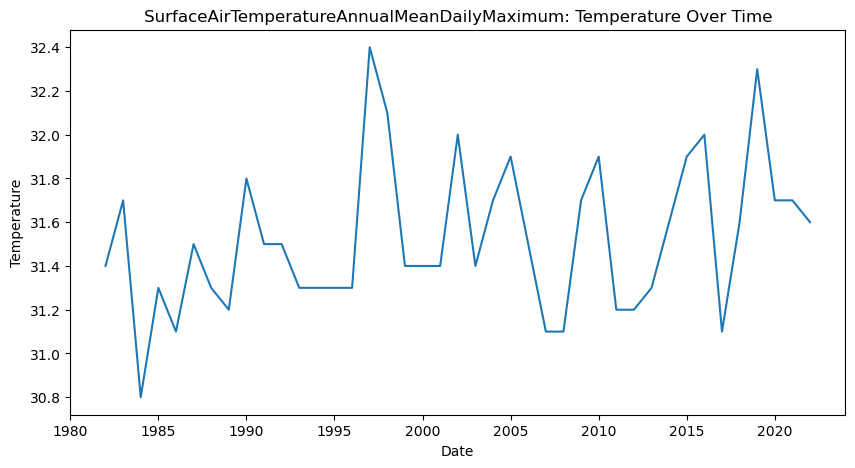

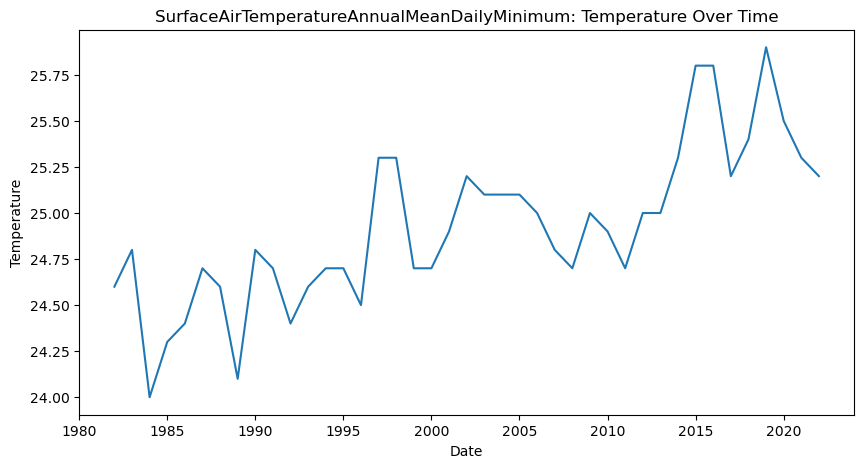

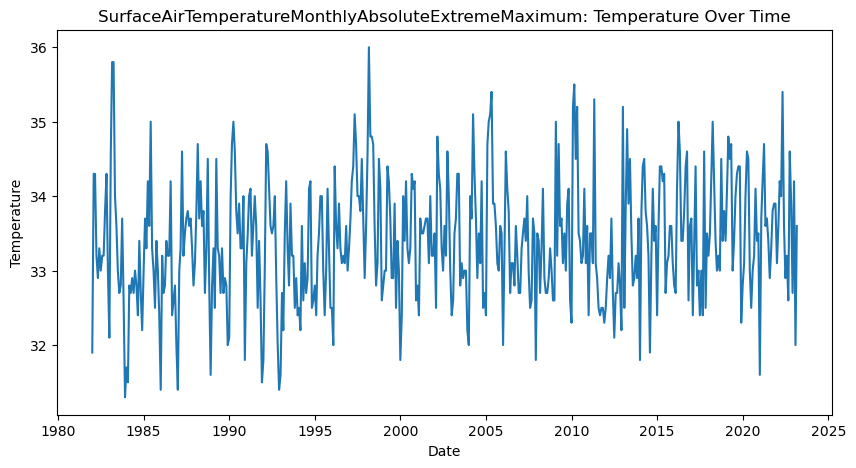

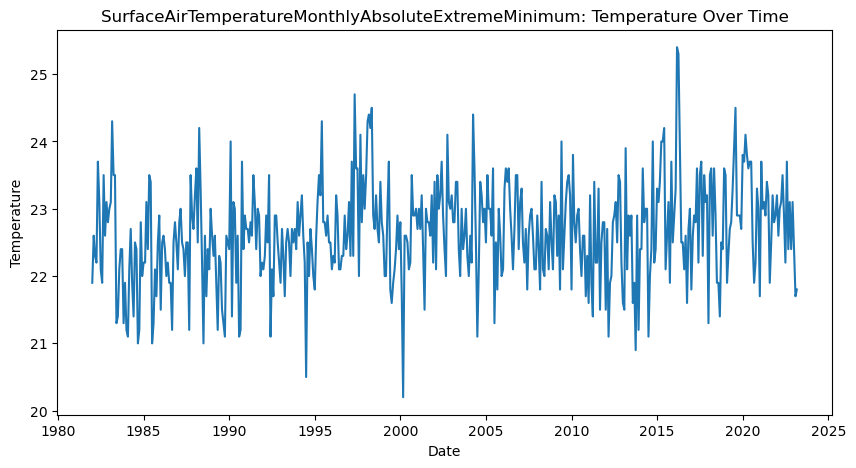

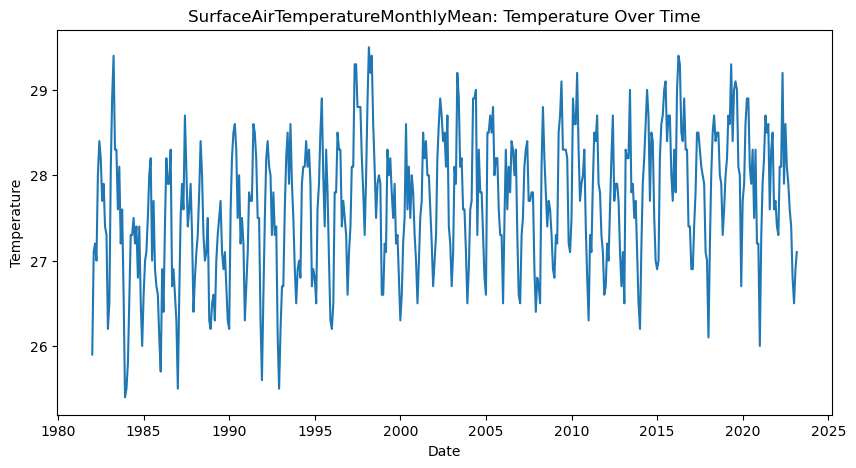

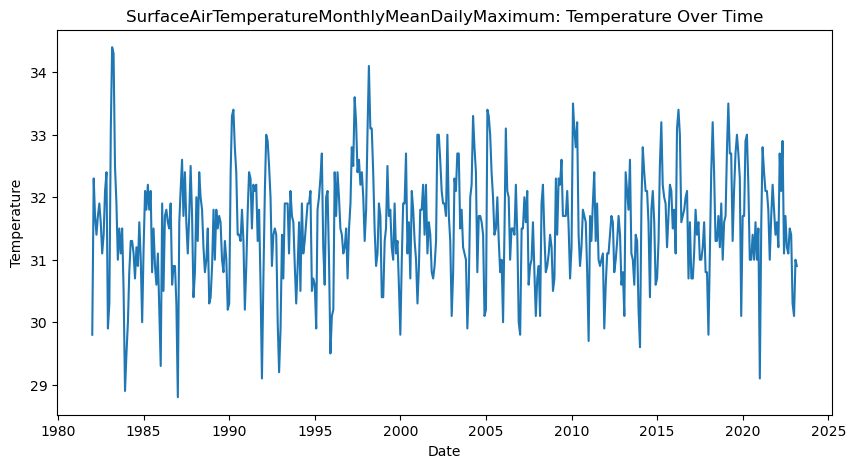

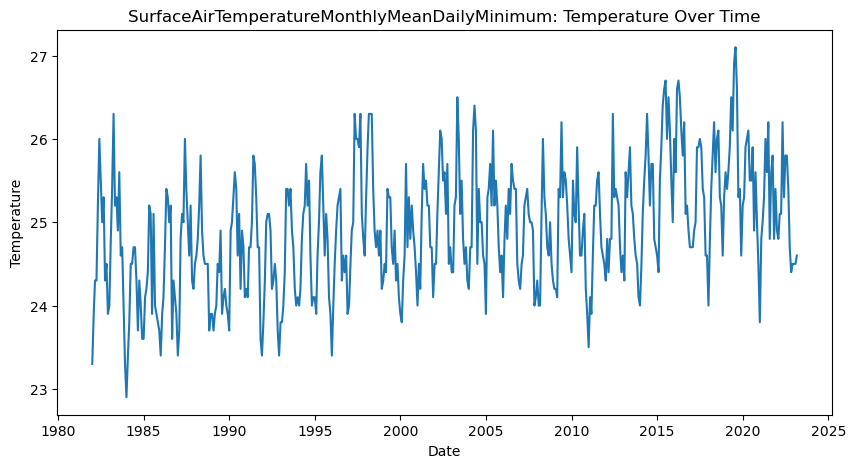

In [6]:
#visualization

import matplotlib.pyplot as plt

for name, data in preprocessed_dataframes.items():
    plt.figure(figsize=(10, 5))
    
    # Find the right column for temperature
    temp_col = None
    for col in ['temp_mean_daily_max', 'tem_mean_daily_min', 'max_temperature', 'temp_extremes_min', 'mean_temp', 'temp_mean_daily_max', 'temp_mean_daily_min']:
        if col in data.columns:
            temp_col = col
            break

    if temp_col:
        # Convert PeriodIndex to a timestamp for plotting if necessary
        if isinstance(data.index, pd.PeriodIndex):
            data.index = data.index.to_timestamp()

        plt.plot(data.index, data[temp_col])
        plt.xlabel('Date')
        plt.ylabel('Temperature')
        plt.title(f'{name}: Temperature Over Time')
    else:
        print(f"Expected temperature column not found in {name}")
    
    plt.show()


In [10]:
temperature_df = pd.read_csv(r'C:\Users\Ken\Documents\Code Projects\Data_ML_Projects\MLProjectClimateResearch\ClimateResearchProject\docs\temperature_data.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 14: invalid start byte